Mhviraf's [kernel](https://www.kaggle.com/mhviraf/synthetic-data-for-next-instant-gratification) shows the data might be generated by using sklearn's `make_classification`

Using QDA I got a few train rows with high oof score & label 0, or low oof score & label 1.

So I change these data's target to see if it works.

Most part of this notebook is taken from Roman's [kernel](https://www.kaggle.com/nroman/i-m-overfitting-and-i-know-it) & Chris's [kernel](https://www.kaggle.com/cdeotte/pseudo-labeling-qda-0-969)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook
import warnings
import multiprocessing
from scipy.optimize import minimize  
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
print(train.shape, test.shape)

(262144, 258) (131073, 257)


In [3]:
def get_mean_cov(x,y):
    model = GraphicalLasso()
    ones = (y==1).astype(bool)
    x2 = x[ones]
    model.fit(x2)
    p1 = model.precision_
    m1 = model.location_
    
    onesb = (y==0).astype(bool)
    x2b = x[onesb]
    model.fit(x2b)
    p2 = model.precision_
    m2 = model.location_
    
    ms = np.stack([m1,m2])
    ps = np.stack([p1,p2])
    return ms,ps

In [5]:
oof = np.zeros(len(train))
preds = np.zeros(len(test))
records=[]

for i in tqdm_notebook(range(512)):

    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)

    data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
#     pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
    pipe = Pipeline([('vt', VarianceThreshold(threshold=1.5))])
    data2 = pipe.fit_transform(data[cols])

#     data2_new = []
#     for j in range(data2.shape[1]):
#         if((data2[:,j].std() > 3.5) & (data2[:,j].std() <5)):
#             data2_new.append(data2[:,j])

#     data2 = np.asarray(data2_new).transpose()
    
    train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]
    print(i, train3.shape,train3.std())

#     skf = StratifiedKFold(n_splits=20, random_state=42)
#     for train_index, test_index in skf.split(train2, train2['target']):

#         clf = QuadraticDiscriminantAnalysis(0.1)
#         clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
#         oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
#         preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
#     records.append(roc_auc_score(train['target'][idx1].values, oof[idx1]))
    
auc = roc_auc_score(train['target'], oof)
print(f'AUC: {auc:.5}')

0 (534, 46) 4.062933842972252
1 (510, 34) 3.524470311482558
2 (495, 37) 3.6360270674183712
3 (538, 37) 3.687556642405171
4 (516, 41) 3.8361618964146973
5 (521, 40) 3.7481493562854977
6 (518, 36) 3.6388295460764954
7 (506, 40) 3.7640774321894535
8 (522, 45) 4.037314107580922
9 (528, 43) 3.8574417207764435
10 (498, 46) 4.0310803983231445
11 (482, 37) 3.5916776477209433
12 (496, 36) 3.6270575274643484
13 (485, 41) 3.848138860886562
14 (486, 40) 3.8099930801444453
15 (516, 37) 3.600712445947995
16 (517, 43) 3.8947752336125276
17 (511, 38) 3.711806672398267
18 (518, 44) 3.957034351689069
19 (526, 35) 3.6135829282686363
20 (512, 38) 3.653094551527355
21 (532, 37) 3.6902067584153873
22 (537, 40) 3.737121789859226
23 (522, 47) 4.100143349959571
24 (495, 45) 3.976950950313676
25 (491, 45) 4.014289231176352
26 (489, 46) 4.063198972595062
27 (504, 43) 3.9044901332035113
28 (537, 43) 3.9207571820221148
29 (498, 40) 3.7833514199408094
30 (515, 47) 4.078652364301883
31 (509, 42) 3.8579703017905764
3

288 (509, 47) 4.068964391296842
289 (497, 38) 3.626802650138358
290 (522, 39) 3.764732275007105
291 (521, 34) 3.5085055337426994
292 (499, 33) 3.4876159867178567
293 (491, 43) 3.9448872825674037
294 (517, 37) 3.6477933255267163
295 (522, 33) 3.4571682464710483
296 (511, 35) 3.5848491752924834
297 (507, 45) 3.9890667225889493
298 (554, 46) 4.0369852317229284
299 (543, 42) 3.829630497877438
300 (508, 36) 3.620681056244326
301 (532, 33) 3.4598909962933586
302 (529, 40) 3.77497023938194
303 (503, 37) 3.659952246285779
304 (503, 46) 4.035176685624043
305 (508, 38) 3.6642726946477175
306 (486, 41) 3.828779037701132
307 (515, 45) 4.037874809387273
308 (517, 43) 3.9158652784392274
309 (506, 38) 3.7548827156894236
310 (513, 44) 4.002958097647772
311 (543, 38) 3.6754136205857693
312 (511, 36) 3.635562454830607
313 (502, 45) 3.962907088044487
314 (530, 38) 3.6912502537885605
315 (497, 37) 3.6402325303352483
316 (506, 38) 3.661412212147842
317 (533, 34) 3.4645945323142766
318 (511, 33) 3.476134455

In [16]:
for itr in range(2):
    test['target'] = preds
    test.loc[test['target'] > 0.9, 'target'] = 1
    test.loc[test['target'] < 0.1, 'target'] = 0
    usefull_test = test[(test['target'] == 1) | (test['target'] == 0)]
    new_train = pd.concat([train, usefull_test]).reset_index(drop=True)
    print(usefull_test.shape[0], "Test Records added for iteration : ", itr)
    
    new_train.loc[oof > 0.95, 'target'] = 1
    new_train.loc[oof < 0.05, 'target'] = 0
    
    oof2 = np.zeros(len(train))
    preds = np.zeros(len(test))
    tmp = np.ones((usefull_test.shape[0]),dtype = bool)
    records2=[]
    thr=0.000
    
    for i in tqdm_notebook(range(512)):
        
        
        train2 = new_train[(new_train['wheezy-copper-turtle-magic']==i) & (np.concatenate((abs(oof-0.5) > thr,tmp),axis=0))]
        test2 = test[test['wheezy-copper-turtle-magic']==i]
        idx1 = train[(train['wheezy-copper-turtle-magic']==i) & (abs(oof-0.5) > thr)].index
        idx2 = test2.index
        train2.reset_index(drop=True,inplace=True)

        data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
        pipe = Pipeline([('vt', VarianceThreshold(threshold=5)), ('scaler', StandardScaler())])
        data2 = pipe.fit_transform(data[cols])
        
#         data2_new = []
#         for j in range(data2.shape[1]):
#             if((data2[:,j].std() > 3.5) & (data2[:,j].std() <5)):
#                 data2_new.append(data2[:,j])

#         data2 = np.asarray(data2_new).transpose()
    
        train3 = data2[:train2.shape[0]]
        test3 = data2[train2.shape[0]:]

        skf = StratifiedKFold(n_splits=10, random_state=42)
        for train_index, test_index in skf.split(train2, train2['target']):
            oof_test_index = [t for t in test_index if t < len(idx1)]
            
            clf = QuadraticDiscriminantAnalysis(0.1)
            clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
            if len(oof_test_index) > 0:
                oof2[idx1[oof_test_index]] = clf.predict_proba(train3[oof_test_index,:])[:,1]
            preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
        records2.append(roc_auc_score(train['target'][idx1].values, oof2[idx1]))
    
    auc = roc_auc_score(train['target'], oof2)
    print(f'AUC: {auc:.5}')

122230 Test Records added for iteration :  0



AUC: 0.97075
122537 Test Records added for iteration :  1



AUC: 0.97071


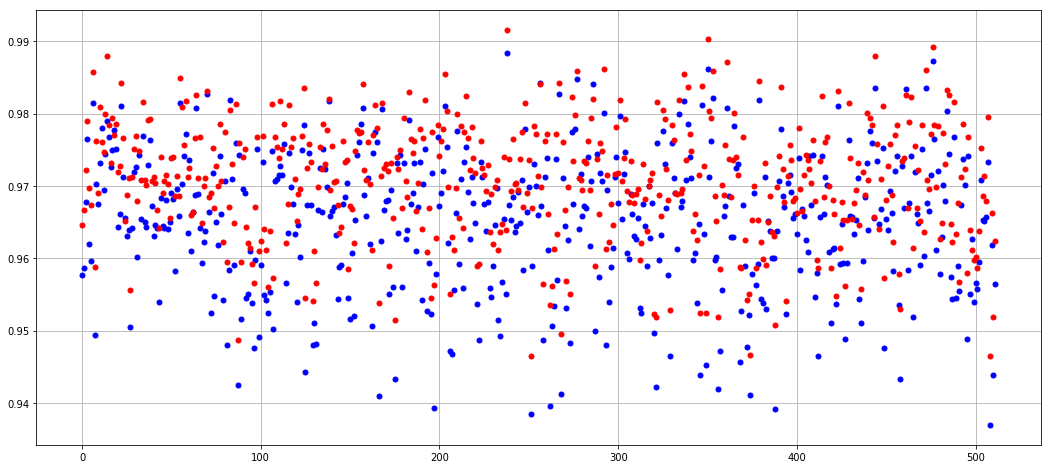

In [15]:
plt.figure(figsize=(18,8))
plt.plot(records,'.b',markersize=10)

plt.plot(records2,'.r',markersize=10)
plt.grid()

In [7]:
# sub = pd.read_csv('../input/sample_submission.csv')
# sub['target'] = preds
# sub.to_csv('submission.csv',index=False)

In [9]:
# i = 0
# train2 = train[train['wheezy-copper-turtle-magic']==i]
# test2 = test[test['wheezy-copper-turtle-magic']==i]
# idx1 = train2.index; idx2 = test2.index
# train2.reset_index(drop=True,inplace=True)

# data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
# #     pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
# pipe = Pipeline([('vt', VarianceThreshold(threshold=2))])
# data2 = pipe.fit_transform(data[cols])

# data2_new = []
# for j in range(data2.shape[1]):
#     if((data2[:,j].std() > 3.5) & (data2[:,j].std() <5)):
#         data2_new.append(data2[:,j])
        
# data2 = np.asarray(data2_new).transpose()

# train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]

# print(train3.shape)
# print(train3.mean(), train3.std())

# skf = StratifiedKFold(n_splits=10, random_state=42)
# for train_index, test_index in skf.split(train2, train2['target']):
    
#     clf = QuadraticDiscriminantAnalysis(111)
#     clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
#     oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
#     preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits

# print(roc_auc_score(train['target'][idx1].values, oof[idx1]))

In [10]:
# for i in range(train3.shape[1]):
#     print(train3[:,i].mean(), train3[:,i].std())